# Probability distributions

In the particle physics there are a few common probability (density) distributions that appear over and over. Let's have a look at some of them. 

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

The first one is the Poisson distribution. Remember that this distribution is the limiting case of a binomial distribution where the parameter $\lambda=\frac{p}{N}$ stays constant as the probability for success $p\rightarrow 0$ and the number of trials $N\rightarrow \infty$.

if $k\sim \mathrm{Poisson}(\lambda)$, then

$$
f(k; \lambda) = \frac{\lambda^{k}}{k!}e^{-\lambda}
$$

The `scipy.stats.poisson` module can be used to plot this distribution and its CDF for different values of $\lambda$. 

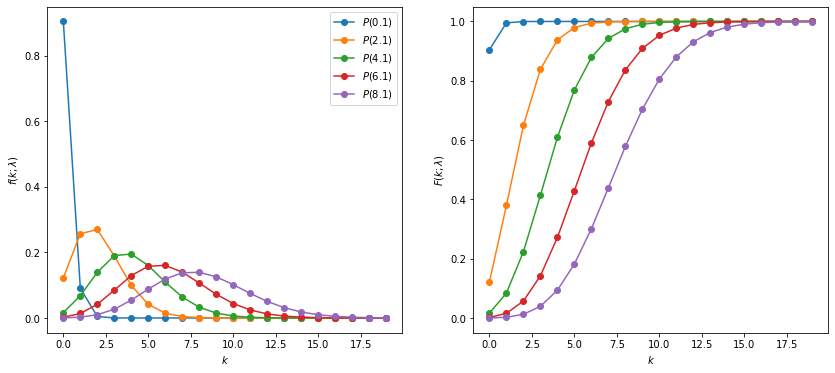

In [5]:
from scipy.stats import poisson

x = range(0,20) 
# 5 different values of \lambda
lambdas = numpy.arange(0.1,10,2.0)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,poisson.pmf(x,i),label="$P(%g)$"%i,marker="o") for i in lambdas ]
[ ax2.plot(x,poisson.cdf(x,i),label="$P(%g)$"%i,marker="o") for i in lambdas ]

ax1.set_xlabel("$k$")
ax1.set_ylabel("$f(k;\lambda)$")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$F(k;\lambda)$")

ax1.legend()
plt.show()

The next one for this notebook is the Gaussian (or Normal) probability density. In the lectures, we showed that for large values of the Poisson parameter $\lambda\rightarrow +\infty$, the Poisson distribution converges to a Gaussian distribution with a mean of $\mu=\lambda$ and a variance of $\sigma^{2}=\lambda$. If a random variable  $X$ is distributed as a Normal distribution $\phi(\mu,\sigma)$, then ;

$$
f(X;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{1}{2}\left(\frac{X-\mu}{\sigma}\right)^{2}}
$$

In `scipy` we can obtain the pdf and cdf of a Normal distribution using`scipy.stats.norm`.

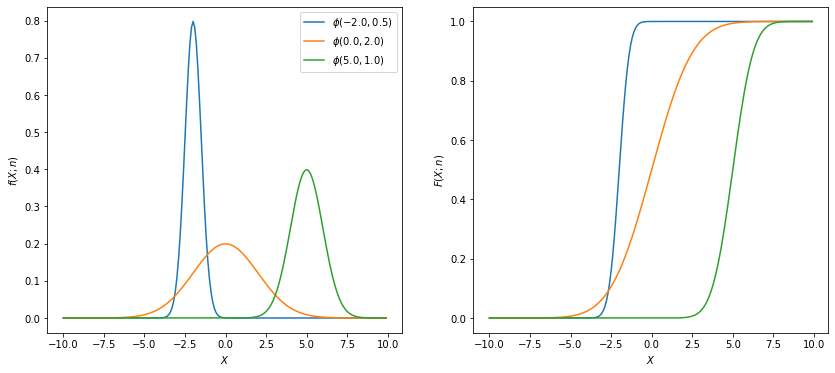

In [3]:
from scipy.stats import norm

x = numpy.arange(-10,10,0.1)
mu_range    = [-2,0,5]
sigma_range = [0.5,2,1]
# plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,norm.pdf(x,m,s),label="$\phi(%.1f,%.1f)$"%(m,s)) for m,s in zip(mu_range,sigma_range)]
[ ax2.plot(x,norm.cdf(x,m,s),label="$\phi(%.1f,%.1f)$"%(m,s)) for m,s in zip(mu_range,sigma_range)]

ax1.set_xlabel("$X$")
ax1.set_ylabel("$f(X;n)$")
ax2.set_xlabel("$X$")
ax2.set_ylabel("$F(X;n)$")

ax1.legend()
plt.show()

The $\chi^{2}$ distribution is an important distribution when applying Wilks' theorem, which is covered in the lectures. For example, if $X$ is distributed as a Normal distribution, then $X^{2}$ will be distributed as a $\chi^{2}$ with 1 degree of freedom. 

If $X\sim \chi^{2}(1)$, then 

$$
f(X;1) = \frac{1}{\sqrt{2\pi X}}  e^{-\frac{X}{2}}
$$

The `scipy.stats.chi2` module can show us this distribution for any number of degrees of freedom. 

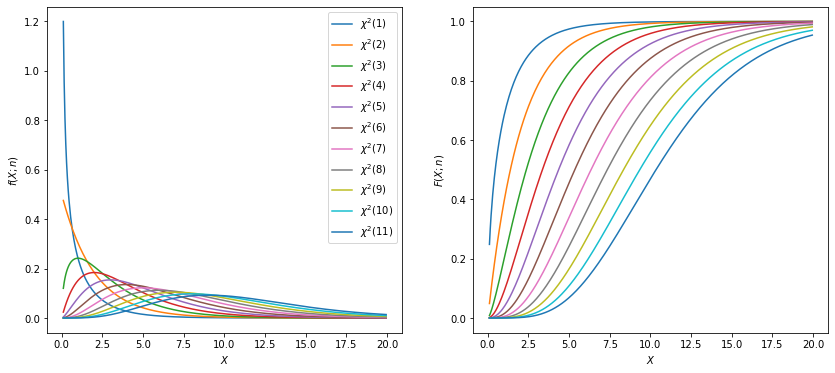

In [4]:
from scipy.stats import chi2

x = numpy.arange(0.1,20,0.05)
ndof = range(1,12,1)

# plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,chi2.pdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]
[ ax2.plot(x,chi2.cdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]

ax1.set_xlabel("$X$")
ax1.set_ylabel("$f(X;n)$")
ax2.set_xlabel("$X$")
ax2.set_ylabel("$F(X;n)$")

ax1.legend()
plt.show()